# Slides exploration and visualisation

In [2]:
import seaborn as sns
from pathlib import Path
from queries import*
from utilities import*
import os
import matplotlib 

In [3]:
plt.rcParams['font.size'] = '17'

## Phenotype counting per slide
Here we extract a table for CHUV doctors, in which we count the phenotypes per slides

In [4]:
Directory = Path(Path.cwd()).parent
Directory_path = os.path.join(Directory, 'data','input')
files = os.listdir(Directory_path)
count_phenotype = pd.DataFrame({})


for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition == ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        INPUT_PATH = os.path.join(Directory,'data','input','DEEPMEL_' + PATIENT_ID + '\\')
        INPUT_FILE = 'DEEPMEL_'+ PATIENT_ID +'_cell_seg_data.txt'
        nodes = pd.read_csv(INPUT_PATH + INPUT_FILE,sep='\t')
        columns_to_keep = ['cell_id','cell_x_position','cell_y_position','tissue_category','phenotype']
        nodes = nodes[columns_to_keep]
        INPUT_FILE = 'DEEPMEL_'+ PATIENT_ID +'_cell_seg_data.csv'
        nodes.to_csv(INPUT_PATH + INPUT_FILE, index=False)
        
        nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_' + PATIENT_ID +'_cell_seg_data.csv')
        pheno_count = pd.DataFrame(nodes.phenotype.value_counts()).reset_index().rename(columns = {'index':'stainnings', 'phenotype':'count'})
        pheno_count_pivotted = pd.pivot_table(pheno_count, values='count', index=[],columns=['stainnings'], aggfunc=np.sum)
        pheno_count_pivotted.columns.name = None
        
        pheno_count_pivotted = pheno_count_pivotted.fillna(0)
        pheno_count_pivotted = pheno_count_pivotted.reset_index()
        pheno_count_pivotted = pheno_count_pivotted.drop(['index'], axis=1)
        pheno_count_pivotted['name'] = PATIENT_ID
        
        count_phenotype = pd.concat([count_phenotype,pheno_count_pivotted])        

Treating patient1C5
Treating patient1R2
Treating patient1S2
Treating patient2D2
Treating patient3K1
Treating patient4A1
Treating patient4B1
Treating patient4D1
Treating patient4E1
Treating patient4F1
Treating patient4G1
Treating patient4H1
Treating patient4I1
Treating patient4J1
Treating patient4K1
Treating patient4L1
Treating patient4N1
Treating patient4O1
Treating patient4P1
Treating patient4Q1
Treating patient4R1
Treating patient4S1
Treating patient4S1
Treating patient4S1
Treating patient4S1


In [5]:
count_phenotype = count_phenotype.fillna(0)

In [6]:
columns = list(count_phenotype.columns[16:]) + list(count_phenotype.columns[:16])

In [7]:
count_phenotype = count_phenotype[columns]

In [8]:
count_phenotype = count_phenotype.drop_duplicates(['name'])

In [9]:
base_directory = Path(Path.cwd()).parent
OUTPUT = os.path.join(base_directory,'data','output')

In [10]:
count_phenotype.to_csv(os.path.join(OUTPUT, 'pheno_count.csv'), index=False)

In [11]:
count_phenotype = pd.read_csv(os.path.join(OUTPUT, 'pheno_count.csv'))

In [12]:
len(count_phenotype)

22

In [13]:
count_phenotype

CD3p_CD68p  CD11cp  CD11cp_CD56p   CD20p    CD3p  CD56p   DAPIp  MISSING  \
0          0.0  114463        9062.0     561    7958  14539  506219    13636   
1          0.0    4167           0.0    5890  185676    913  228134    15943   
2         10.0    4037          10.0  220488  253774  94589  335702    18121   
3          0.0    9654           1.0   27003   24064    976  285098     6949   
4          1.0   15496           2.0  698624  904850   3388  993830    32359   
5          1.0     329           0.0     355    3855     61   49711     1585   
6         11.0    2552          51.0    2984   10462    919  107064     2477   
7          0.0   14505           1.0     328    3522    278  180881    11360   
8        256.0   11936         300.0    8691   90547   3772  314445     5537   
9         79.0    9248          11.0     216    4855    809   67418     2078   
10        29.0     426          11.0    2467   31452   2068  100255     6736   
11       567.0    3593          10.0    2156   29638   1525  239567     4253   
12         9.0    4697           8.0     704   20393   2809   91238     1719   
13         0.0   60090        1316.0   20130    5969   8272  281016    10475   
14        27.0     658           7.0     543    8361   1208   96059     3630   
15        43.0    2556          74.0     186    5817    273   39653      588   
16        41.0    5093           6.0    1256   14277    343   49189      833   
17      1602.0   62937         145.0   22810  169852    203  490245    19839   
18         0.0   68051          37.0   22536   28005    443  388366     5778   
19       312.0    2064          28.0   13364   82811   6067  191755    11383   
20         2.0   81451        1741.0     330     898  19141  241484     4064   
21       418.0   44229         417.0   28339  234987   1857  224470    12772   

     SOX10p  SOX10p_CD56p name  CD3p_CD56p   CD68p  SOX10p_CD68p  \
0    635851          4534  1C5         0.0     0.0           0.0   
1   1150827           223  1R2        10.0    14.0           1.0   
2    551775        255047  1S2       516.0    49.0           6.0   
3    344874           146  2D2        34.0     6.0           0.0   
4    549105           117  3K1         6.0     7.0           0.0   
5     86348             9  4A1         0.0     1.0           0.0   
6     90540          3404  4B1        60.0    36.0           5.0   
7    922104            35  4D1         0.0    36.0           8.0   
8     84207           159  4E1       483.0  1350.0          58.0   
9    107908           718  4F1        56.0   517.0          42.0   
10   433413           473  4G1        81.0   321.0          19.0   
11   114110         10579  4H1        32.0  5217.0         420.0   
12    46671         10750  4I1       326.0    41.0           2.0   
13   641186          5313  4J1       252.0    10.0           1.0   
14   200621           486  4K1        31.0   336.0          87.0   
15     9686           223  4L1        20.0    71.0           0.0   
16    14247            23  4N1        52.0    59.0           1.0   
17  1060224           100  4O1         0.0  3064.0        1013.0   
18   103856           132  4P1         0.0    81.0           3.0   
19   703407          5284  4Q1        76.0   930.0         227.0   
20   119943          8089  4R1         2.0   378.0          28.0   
21   647443            81  4S1       539.0   275.0          24.0   

    CD11cp_CD68p  CD20p_CD56p  CD20p_CD68p  
0            0.0          0.0          0.0  
1            0.0          0.0          0.0  
2            3.0         84.0          8.0  
3            0.0         98.0          2.0  
4            0.0         86.0          0.0  
5            0.0          1.0          0.0  
6            9.0         15.0          7.0  
7            0.0          0.0          0.0  
8          119.0         19.0          8.0  
9          168.0          3.0          3.0  
10           0.0          6.0          2.0  
11         247.0         15.0         38.0  
12           

## Inspecting Double positive stainings : SOX10p_CD56p , SOX10p_CD68p

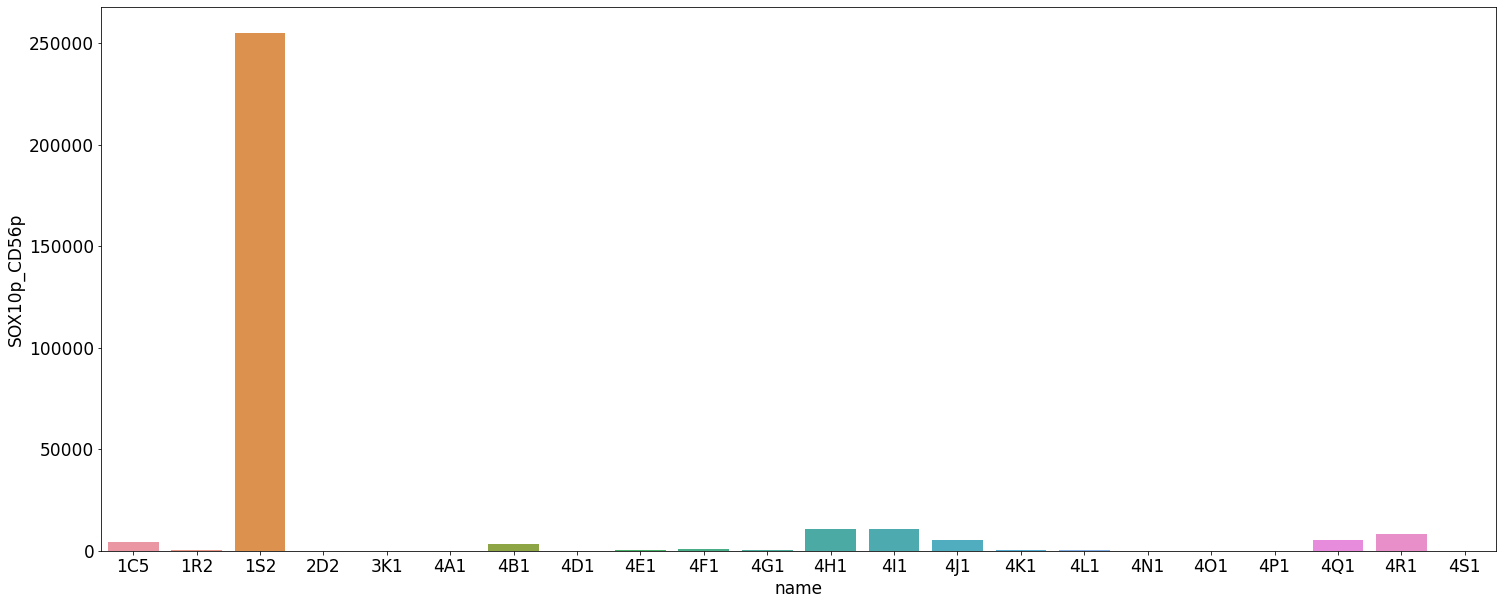

In [14]:
PLOT_DIRECTORY = os.path.join(base_directory,'plots','ANALYSIS')
columns_to_keep = ['name', 'SOX10p_CD56p', 'SOX10p_CD68p']
data = count_phenotype[columns_to_keep]
plt.subplots(figsize=(25, 10))

sns.barplot(x="name", y="SOX10p_CD56p", data=data)
plt.savefig(PLOT_DIRECTORY +'SOX10p_CD56p.png')

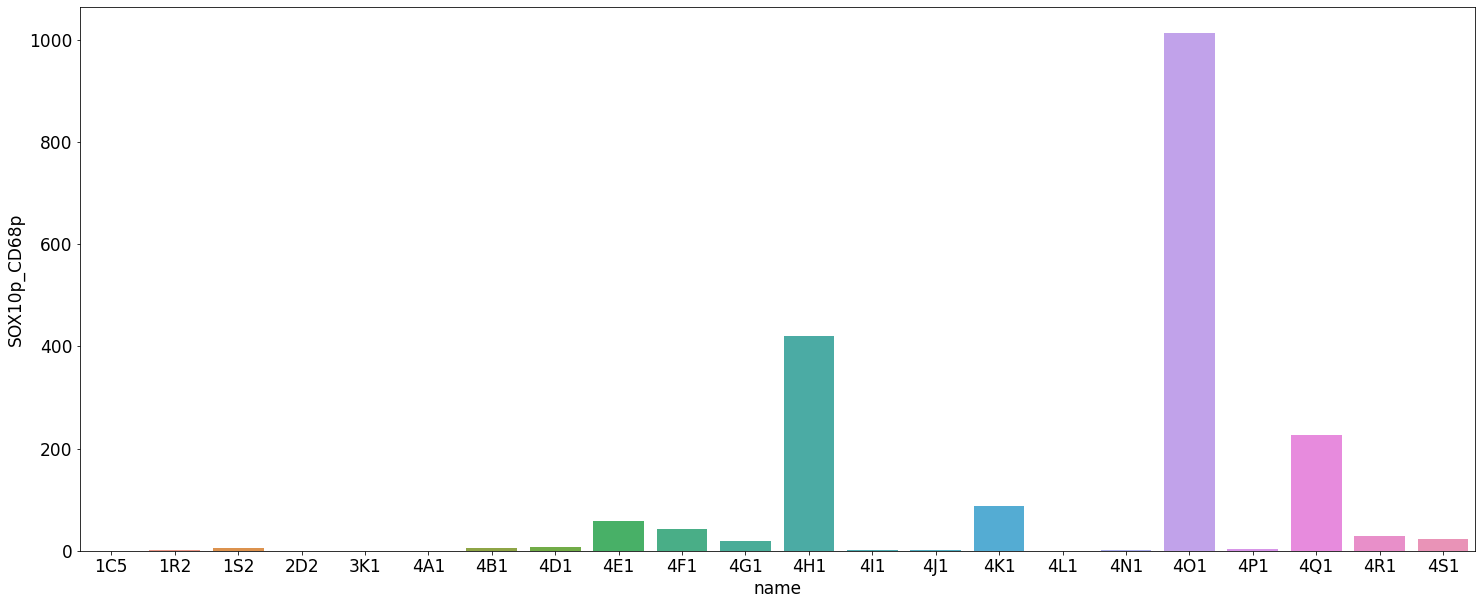

In [15]:
columns_to_keep = ['name', 'SOX10p_CD56p', 'SOX10p_CD68p']
data = count_phenotype[columns_to_keep]
f, ax = plt.subplots(figsize=(25, 10))

ax = sns.barplot(x="name", y="SOX10p_CD68p", data=data,  )
plt.savefig(PLOT_DIRECTORY +'SOX10p_CD68p.png')

## Explorining the repartition of Tissue type (category) per slide

In [16]:
Directory_path = os.path.join(base_directory, 'data', 'input')
files = os.listdir(Directory_path)
count_tissue = pd.DataFrame({})

len_slide = {}

for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition == ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        INPUT_PATH = os.path.join(Directory,'data','input','DEEPMEL_' + PATIENT_ID + '\\')
        
        nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_' + PATIENT_ID +'_cell_seg_data.csv')
        n = len(nodes)
    
        count_tissu = pd.DataFrame(nodes.tissue_category.value_counts()).reset_index().rename(columns={'tissue_category':'count','index':'tissue'})
        count_tissu['count'] = count_tissu['count']/n
        count_tissue_pivotted = pd.pivot_table(count_tissu, values='count', index=[],columns=['tissue']) 
        count_tissue_pivotted.columns.name = None
        
        count_tissue_pivotted = count_tissue_pivotted.fillna(0)
        count_tissue_pivotted = count_tissue_pivotted.reset_index()
        count_tissue_pivotted = count_tissue_pivotted.drop(['index'], axis=1)
        count_tissue_pivotted['name'] = PATIENT_ID
        
        count_tissue = pd.concat([count_tissue,count_tissue_pivotted])              

Treating patient1C5
Treating patient1R2
Treating patient1S2
Treating patient2D2
Treating patient3K1
Treating patient4A1
Treating patient4B1
Treating patient4D1
Treating patient4E1
Treating patient4F1
Treating patient4G1
Treating patient4H1
Treating patient4I1
Treating patient4J1
Treating patient4K1
Treating patient4L1
Treating patient4N1
Treating patient4O1
Treating patient4P1
Treating patient4Q1
Treating patient4R1
Treating patient4S1
Treating patient4S1
Treating patient4S1
Treating patient4S1


In [17]:
count_tissue

missing    stroma     tumor name
0  0.207093  0.235740  0.557167  1C5
0  0.010515  0.137844  0.851641  1R2
0  0.030557  0.447168  0.522275  1S2
0  0.072785  0.392863  0.534352  2D2
0  0.010634  0.761285  0.228081  3K1
0  0.026389  0.296142  0.677469  4A1
0  0.109045  0.333968  0.556987  4B1
0  0.062320  0.063848  0.873832  4D1
0  0.175189  0.664939  0.159872  4E1
0  0.508646  0.370068  0.121285  4F1
0  0.000076  0.158090  0.841834  4G1
0  0.021820  0.640194  0.337986  4H1
0  0.147860  0.405435  0.446706  4I1
0  0.258548  0.074991  0.666461  4J1
0  0.042402  0.177424  0.780174  4K1
0  0.097672  0.684466  0.217862  4L1
0  0.180439  0.592028  0.227533  4N1
0  0.103838  0.264930  0.631231  4O1
0  0.400247  0.481776  0.117977  4P1
0  0.000064  0.161892  0.838044  4Q1
0  0.579291  0.286694  0.134014  4R1
0  0.000958  0.456349  0.542693  4S1
0  0.000958  0.456349  0.542693  4S1
0  0.000958  0.456349  0.542693  4S1
0  0.000958  0.456349  0.542693  4S1

In [18]:
#A = pd.DataFrame(len_slide.iloc[0,:]).sort_values(by=0)

In [19]:
font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


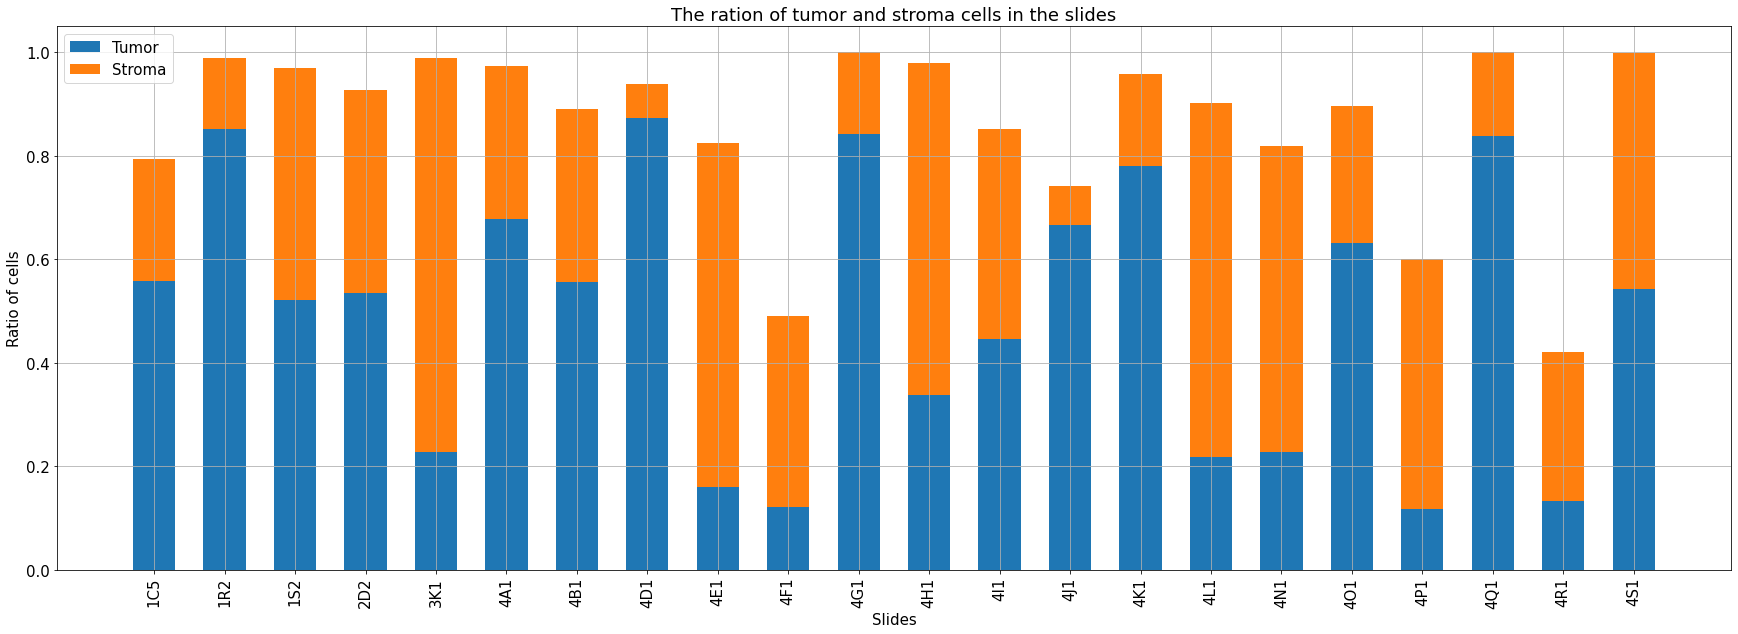

In [20]:
missing = count_tissue.missing.values
stroma = count_tissue.stroma.values
tumor = count_tissue.tumor.values

name = count_tissue.name.values
width = 0.6

fig, ax = plt.subplots(figsize = (30,10))

ax.bar(name, tumor, width, label='Tumor')
ax.bar(name, stroma, width, bottom = tumor, label='Stroma', )
plt.xticks(rotation=90) 
plt.title('The ration of tumor and stroma cells in the slides')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Ratio of cells')
ax.legend()
plt.savefig(PLOT_DIRECTORY +'ratio_tumor_stroma.png')

In [21]:
#x = A.index
#y = A.iloc[:,0].values

In [22]:
'''f, ax = plt.subplots(figsize=(25, 10))
plt.bar(x=x,height=y)
plt.xticks(rotation=90) 

plt.title('Size per slides')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Size')
plt.savefig(PLOT_DIRECTORY +'Size_per_slide.png')
plt.close()
'''

"f, ax = plt.subplots(figsize=(25, 10))\nplt.bar(x=x,height=y)\nplt.xticks(rotation=90) \n\nplt.title('Size per slides')\nplt.grid()\nplt.xlabel('Slides')\nplt.ylabel('Size')\nplt.savefig(PLOT_DIRECTORY +'Size_per_slide.png')\nplt.close()\n"

### Visualising slides: Per Tissue category

In [23]:
PATIENT_ID = '4S1' 
INPUT =   os.path.join(base_directory,'data','input')
PLOT_DIRECTORY = os.path.join(base_directory,'plots','DEEPMEL_')
INPUT_PATH = os.path.join(INPUT,'DEEPMEL_' + PATIENT_ID + '\\')
nodes = pd.read_csv(INPUT_PATH+'DEEPMEL_' + PATIENT_ID +'_cell_seg_data.csv')
unique_pheno = nodes["phenotype"].unique()
palette_pheno = dict(zip(unique_pheno, sns.color_palette(n_colors=len(unique_pheno))))
unique_tissue = nodes["tissue_category"].unique()
palette_tissue = dict(zip(unique_tissue, sns.color_palette(n_colors=len(unique_tissue))))

In [24]:
len(nodes)

1196335

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\mdsp\\Desktop\\EPFL\\plots\\DEEPMEL_4S1'

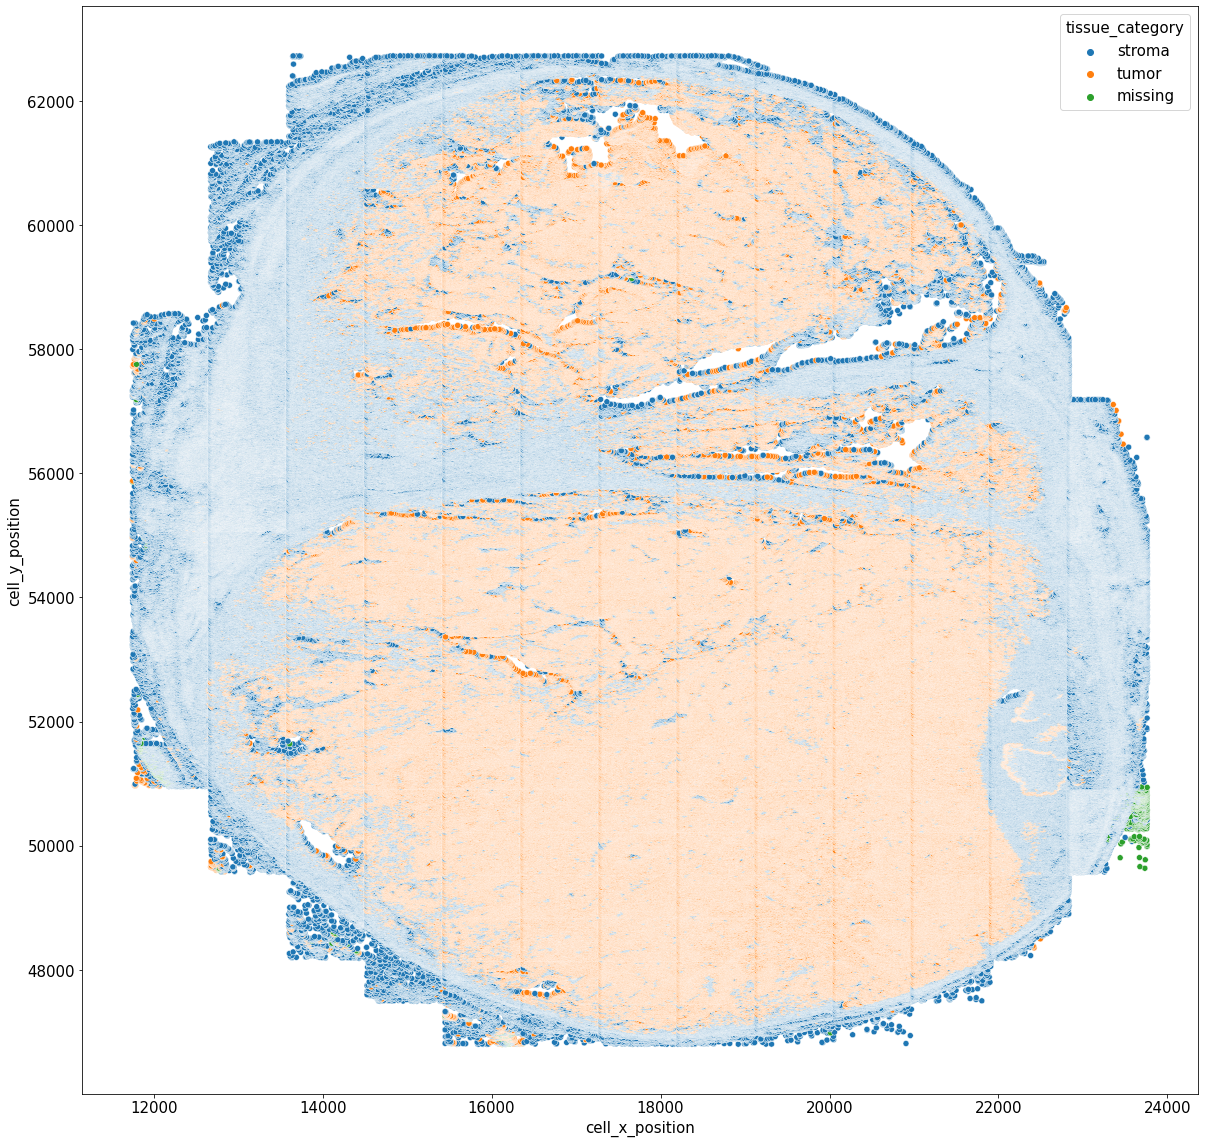

In [25]:
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(data = nodes , x='cell_x_position', y= 'cell_y_position', hue = 'tissue_category',palette = palette_tissue)
os.mkdir(PLOT_DIRECTORY+PATIENT_ID)
plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'\\whole_slide_per_tissue_'+PATIENT_ID+'staining.png')

In [26]:
## Visualising slides : per phenotype

<ipython-input-27-6c901cbbd2d1>:3: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'\\whole_slide_per_phenotype_'+PATIENT_ID+'staining.png')
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


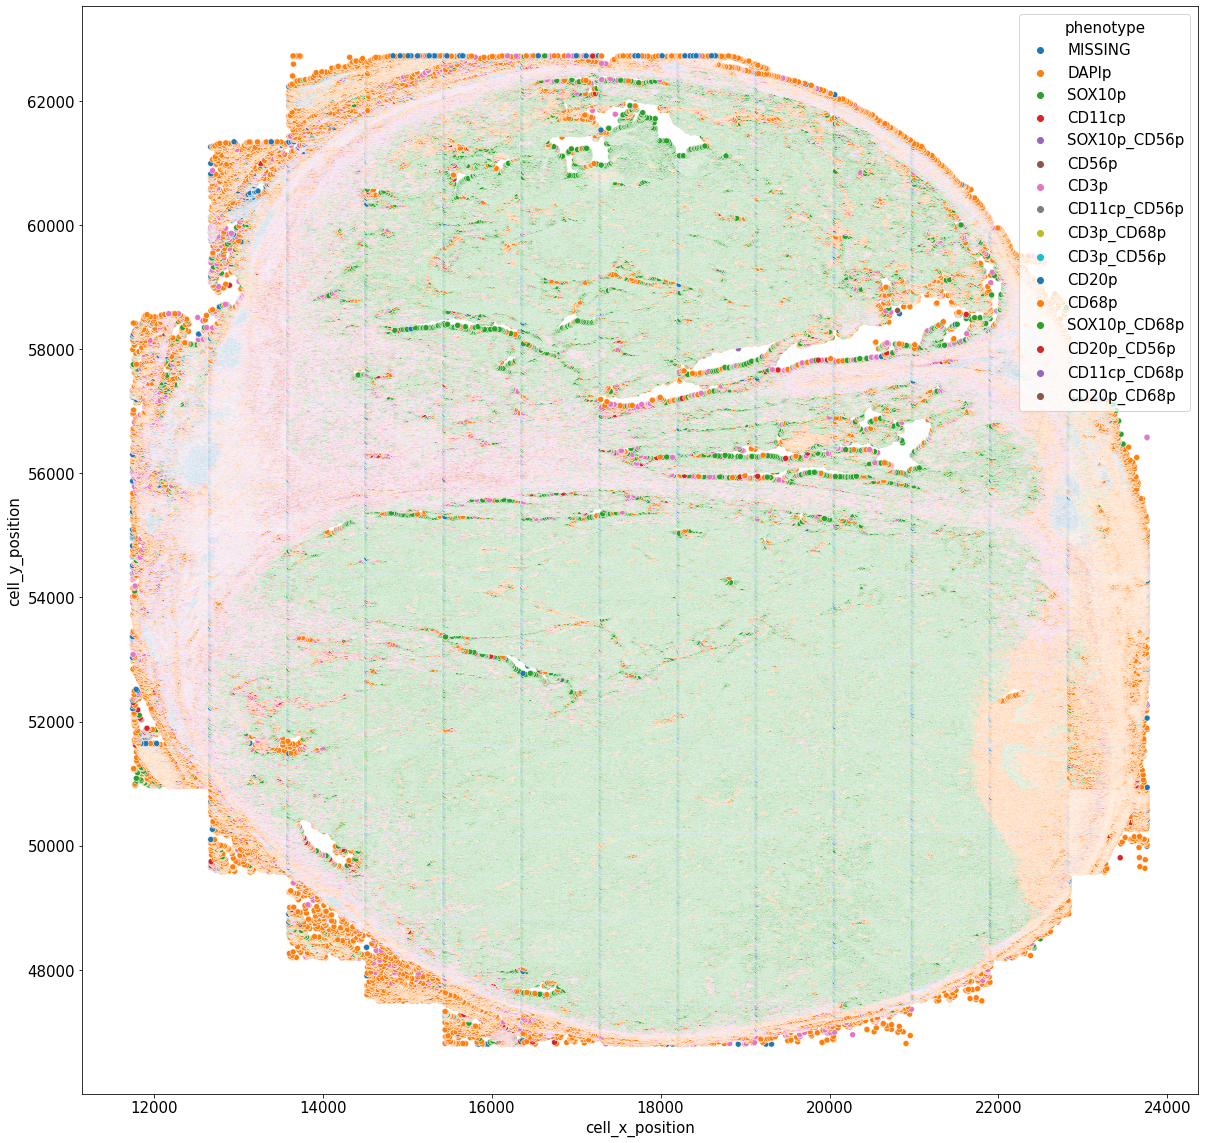

In [27]:
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(data = nodes , x='cell_x_position', y= 'cell_y_position', hue = 'phenotype',palette = palette_pheno)
plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'\\whole_slide_per_phenotype_'+PATIENT_ID+'staining.png')

In [28]:
nodes['phenotype'] = nodes['phenotype'].apply(lambda x: get_phenotype(x))

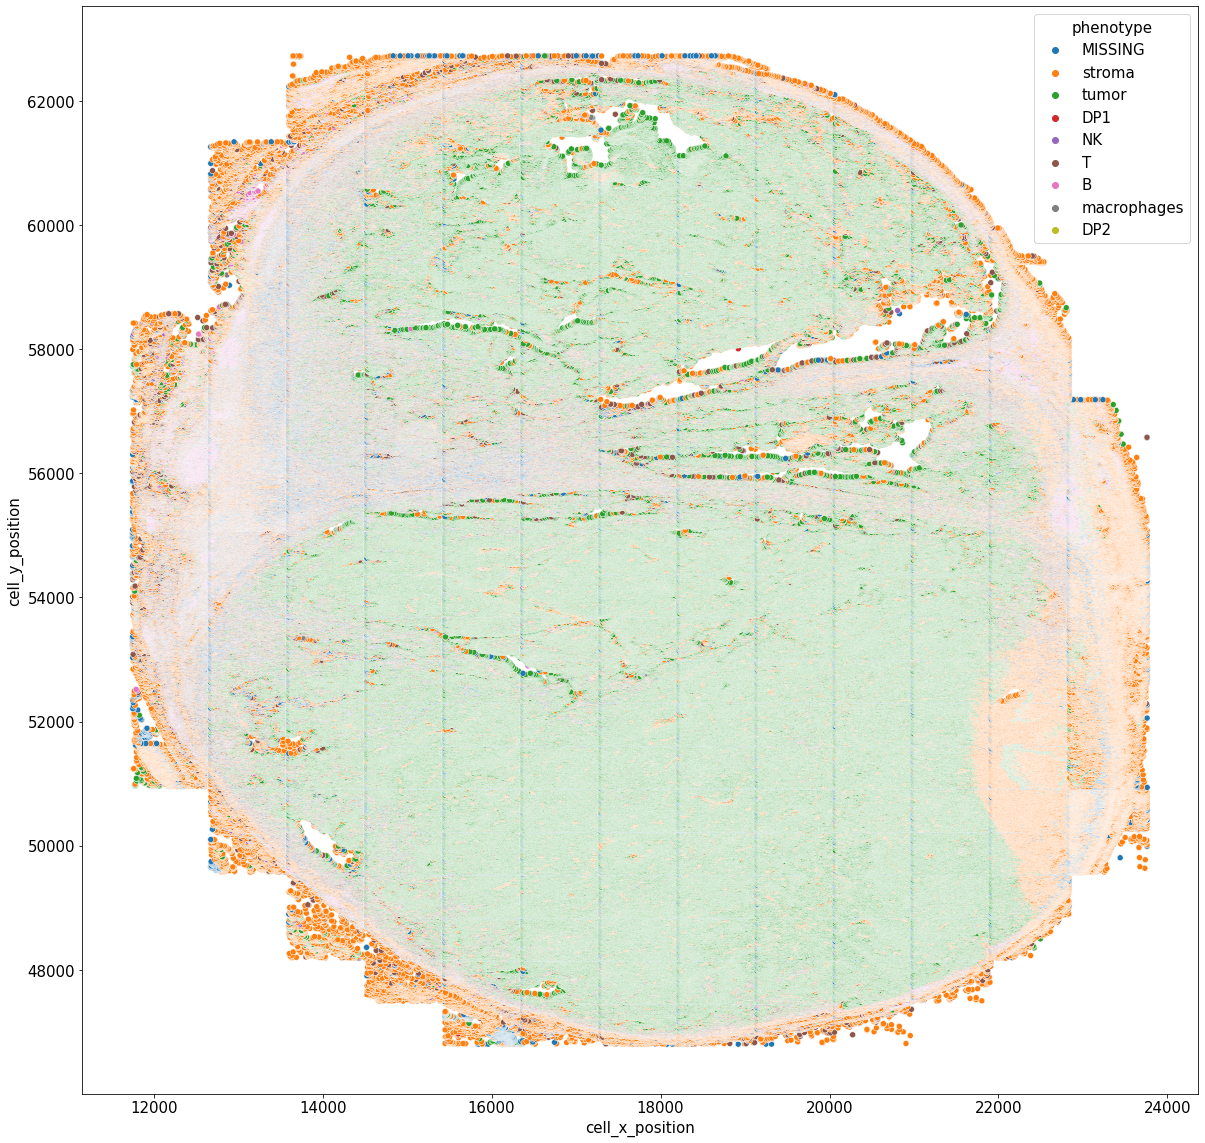

In [29]:
unique_pheno = nodes["phenotype"].unique()
palette_pheno = dict(zip(unique_pheno, sns.color_palette(n_colors=len(unique_pheno))))
fig, ax = plt.subplots(figsize = (20,20))
sns.scatterplot(data = nodes , x='cell_x_position', y= 'cell_y_position', hue = 'phenotype',palette = palette_pheno)
plt.savefig(PLOT_DIRECTORY+PATIENT_ID+'\\whole_slide_per_mapped_phenotype_'+PATIENT_ID+'staining.png')

## Counting Edges, Before and after thresholding

In [30]:
Directory_path = os.path.join(base_directory, 'data','input')
files = os.listdir(Directory_path)
count_edge = pd.DataFrame({})


for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition = ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        OUTPUT_PATH = os.path.join(Directory_path,'DEEPMEL_' + PATIENT_ID + '\\')        
        edges = pd.read_csv(OUTPUT_PATH+'graph_edges.csv')
        n = len(edges)
        df = pd.DataFrame({'name':PATIENT_ID, 'count':n}, index =[0])

        count_edge = pd.concat([count_edge,df])        

Treating patient1C5


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mdsp\\Desktop\\EPFL\\data\\input\\DEEPMEL_1C5\\graph_edges.csv'

In [ ]:
plt.subplots(figsize=(25, 10))
sns.barplot(x="name", y='count', data=count_edge)
plt.xticks(rotation=90) 
plt.title('Number of edges per slide')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Edge number')
plt.savefig(PLOT_DIRECTORY +'n_edges_slides.png')

In [ ]:
Directory = os.getcwd()
Directory_path = Directory + '/data/output'
files = os.listdir(Directory_path)
count_edge = pd.DataFrame({})


for file in files[:]:
    
    array = file.split('_')
    if len(array)==2:
        condition = array[0]
        PATIENT_ID = array[1]
    else:
        condition = ''
        
    
    if condition == 'DEEPMEL':
        
        print('Treating patient' + PATIENT_ID)
        OUTPUT_PATH = './data/output/DEEPMEL_' + PATIENT_ID + '/'
        
        edges = pd.read_csv(OUTPUT_PATH+'edges_thrd_35.csv')
        n = len(edges)
        df = pd.DataFrame({'name':PATIENT_ID, 'count':n}, index =[0])
        
        count_edge = pd.concat([count_edge,df])        

In [ ]:
plt.subplots(figsize=(25, 10))
PLOT_DIRECTORY = './plots/ANALYSIS/'

sns.barplot(x="name", y='count', data=count_edge)
plt.xticks(rotation=90) 
plt.title('Number of extracted edges per slide')
plt.grid()
plt.xlabel('Slides')
plt.ylabel('Edge number')
plt.savefig(PLOT_DIRECTORY +'n_edges_slides_before_thrd.png')